Data 620 Web Analytics

Project 3 -  Gender Classifier



Said Naqwe

Eddie XU

Mohamed Hassan-El Serafi



**Introduction:**  

As a team, we conducted a comprehensive evaluation of machine learning models to compare their performance and identify key strengths and limitations. Our analysis focused on the Decision Tree and Naive Bayes models, assessing their training accuracy, error rates, and predictive consistency across the test set, dev-test set, and an additional dataset. While the Decision Tree model demonstrated higher training accuracy, our collaborative efforts revealed that the Naive Bayes model consistently outperformed it in terms of overall accuracy and reliability in predictions. This joint study lays the groundwork for a detailed discussion of the comparative performance of these models.

**Libraries**

In [ ]:
#import libraries
import nltk
import pandas as pd
import random
from nltk.corpus import names
from nltk.classify import apply_features
import collections
import nltk.metrics
from nltk.metrics import precision,recall,f_measure
import numpy as np
import matplotlib.pyplot as plt

**Data Preparation**

Import name data from the NLTK library files for males and females, combine them into a single dataset, and apply random shuffling to the names.

In [ ]:
#import libraries
import nltk
import pandas as pd
import random
from nltk.corpus import names
from nltk.classify import apply_features
import collections
import nltk.metrics
from nltk.metrics import precision,recall,f_measure
import numpy as np
import matplotlib.pyplot as plt

# Download the 'names' dataset from NLTK
nltk.download('names')

#set seed for recreation
random.seed(620)

#get data from NLTK library files
names_list = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])

# and to make sure we are sampling across all the names
# we shuffle them so they aren't alphabetical
random.shuffle(names_list)

#list names
names_list[0:10] # This line will now have access to names_list after running the first cell that defined it

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


[('Christie', 'female'),
 ('Tibold', 'male'),
 ('Chet', 'male'),
 ('Alyss', 'female'),
 ('Eunice', 'female'),
 ('Mehetabel', 'female'),
 ('Marj', 'female'),
 ('Adam', 'male'),
 ('Natka', 'female'),
 ('Sarene', 'female')]

**Data Stats**

In [ ]:
print("Total count: " , len(names_list)) # Use names_list instead of names

Total count:  7944


Dataset Splitting

The dataset is split according to the following criteria:

500 words for the test set
500 words for the dev-test set
The remaining 6,900+ words for the training set

In [ ]:
test_set = names_list[:500] # Use names_list instead of names
print("test set: " , len(test_set))
devtest_set = names_list[500:1000] # Use names_list instead of names
print("dev test set: " , len(devtest_set))
train_set = names_list[1000:] # Use names_list instead of names
print("train set: " , len(train_set))

test set:  500
dev test set:  500
train set:  6944


**Feature Set - Gender**

To set up the feature set for predicting the output variable, we focus on individual measurable properties or characteristics of the observed phenomenon. In our case, the features will be various patterns and characteristics of the names.

In [ ]:
def gender_features(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    features["suffix2"]= name[-2:].lower()
    features["preffix2"]= name[:2].lower()
    for letter in 'aeiou':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [ ]:
featuresets = [(gender_features(n), g) for (n,g) in names_list] # Changed 'names' to 'names_list'

In [ ]:
train_set_fe = featuresets[1000:]
test_set_fe =featuresets[:500]
devtest_set_fe =featuresets[500:1000]

**Naive Bayes Classifier**

Applying the Naive Bayes Classifier to determine the accuracy of the predictions.

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set_fe)

**Calculate Metrics:** Accuracy, Recall, Precision, and F-Measure

In [ ]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(train_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_train = nltk.classify.accuracy(classifier, train_set_fe)
avg_precision_train = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_train = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_train = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_test = nltk.classify.accuracy(classifier, test_set_fe)
avg_precision_test = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_test = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_test = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


for i, (feats, label) in enumerate(devtest_set_fe):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

accuracy_dev = nltk.classify.accuracy(classifier, devtest_set_fe)
avg_precision_dev = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_dev = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_dev = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2

accuracy_naive_final = [accuracy_train,accuracy_test,accuracy_dev]
precision_naive_final = [avg_precision_train,avg_precision_test,avg_precision_dev]
recall_naive_final = [avg_recall_train,avg_recall_test,avg_recall_dev]
f_measure_naive_final = [avg_f_measure_train,avg_f_measure_test,avg_f_measure_dev]

naive_final_train = [accuracy_train,avg_precision_train,avg_recall_train,avg_f_measure_train]
naive_final_test = [accuracy_test,avg_precision_test,avg_recall_test,avg_f_measure_test]
naive_final_dev = [accuracy_dev,avg_precision_dev,avg_recall_dev,avg_f_measure_dev]
naive_combined = {'Accuracy':accuracy_naive_final,'Precision':precision_naive_final,'Recall':recall_naive_final,'F_Measure':f_measure_naive_final}

df_naive = pd.DataFrame(naive_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])

**Naive Bayes Features List**

In [ ]:
print("---------Naive Bayes Classifier Metrics---------")
print(df_naive)

# Show important features
classifier.show_most_informative_features(20)

---------Naive Bayes Classifier Metrics---------
       Accuracy  Precision    Recall  F_Measure
Train  0.810916   0.437817  0.500000   0.463358
Test   0.802000   0.419760  0.500000   0.454170
Dev    0.778000   0.622769  0.794014   0.695505
Most Informative Features
                 suffix2 = 'na'           female : male   =     93.8 : 1.0
                 suffix2 = 'la'           female : male   =     71.8 : 1.0
                 suffix2 = 'ia'           female : male   =     52.5 : 1.0
              lastletter = 'a'            female : male   =     34.6 : 1.0
                 suffix2 = 'sa'           female : male   =     32.6 : 1.0
                 suffix2 = 'rd'             male : female =     29.4 : 1.0
              lastletter = 'f'              male : female =     28.5 : 1.0
              lastletter = 'k'              male : female =     28.0 : 1.0
                 suffix2 = 'us'             male : female =     27.5 : 1.0
                 suffix2 = 'ra'           female : male   

**Compare with dev test data for error rate - NB**

In [ ]:
# Check errors
errors = []
for (name, tag) in devtest_set:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Aurore                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Barbe                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Bebe                          
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Caron                         
correct=female   guess=male     name=Clemmy                        
correct=female   guess=male     name=Cloris                        
correct=female   guess=male     name=Coleen                        
correct=female   guess=male     name=Colleen                       
correct=female   guess=male     name=Corliss    

**Result of Unmatched Error Count - NB**

In [ ]:
naive_errors = len(errors)
print("Error count: ", naive_errors)

Error count:  111


**Decision Tree Classifier**

Our team applied the decision tree classifier to determine the accuracy of our predictions.

In [ ]:
classifier_tree = nltk.DecisionTreeClassifier.train(train_set_fe)

**Time to Calculate Metrics**

In [ ]:
efsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(train_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_train_dt = nltk.classify.accuracy(classifier_tree, train_set_fe)
avg_precision_train_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_train_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_train_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_test_dt = nltk.classify.accuracy(classifier_tree, test_set_fe)
avg_precision_test_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_test_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_test_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2


for i, (feats, label) in enumerate(devtest_set_fe):
    refsets[label].add(i)
    observed = classifier_tree.classify(feats)
    testsets[observed].add(i)

accuracy_dev_dt = nltk.classify.accuracy(classifier, devtest_set_fe)
avg_precision_dev_dt = (precision(refsets['male'], testsets['male'])+precision(refsets['male'], testsets['female']))/2
avg_recall_dev_dt = (recall(refsets['male'], testsets['male'])+recall(refsets['male'], testsets['female']))/2
avg_f_measure_dev_dt = (f_measure(refsets['male'], testsets['male'])+f_measure(refsets['male'], testsets['female']))/2

accuracy_dt_final = [accuracy_train_dt,accuracy_test_dt,accuracy_dev_dt]
precision_dt_final = [avg_precision_train_dt,avg_precision_test_dt,avg_precision_dev_dt]
recall_dt_final = [avg_recall_train_dt,avg_recall_test_dt,avg_recall_dev_dt]
f_measure_dt_final = [avg_f_measure_train_dt,avg_f_measure_test_dt,avg_f_measure_dev_dt]

dt_final_train = [accuracy_train_dt,avg_precision_train_dt,avg_recall_train_dt,avg_f_measure_train_dt]
dt_final_test = [accuracy_test_dt,avg_precision_test_dt,avg_recall_test_dt,avg_f_measure_test_dt]
dt_final_dev = [accuracy_dev_dt,avg_precision_dev_dt,avg_recall_dev_dt,avg_f_measure_dev_dt]
dt_combined = {'Accuracy':accuracy_dt_final,'Precision':precision_dt_final,'Recall':recall_dt_final,'F_Measure':f_measure_dt_final}
df_dt = pd.DataFrame(dt_combined,index=['Train','Test','Dev'],columns=['Accuracy','Precision','Recall','F_Measure'])

print("---------Decision Tree Classifier Metrics---------")
print(df_dt)

---------Decision Tree Classifier Metrics---------
       Accuracy  Precision    Recall  F_Measure
Train  0.934476   0.518458  0.500000   0.504062
Test   0.746000   0.411106  0.500000   0.448183
Dev    0.778000   0.618248  0.783451   0.687181


Now Compare with dev test data for error rate - DT

In [ ]:
errors2 = []
for (name, tag) in devtest_set:
    guess = classifier_tree.classify(gender_features(name))
    if guess != tag:
        errors2.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Aurore                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Barbe                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Bebe                          
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Caron                         
correct=female   guess=male     name=Clemmy                        
correct=female   guess=male     name=Cloris                        
correct=female   guess=male     name=Coleen                        
correct=female   guess=male     name=Colleen                       
correct=female   guess=male     name=Corliss    

**Result of Unmatched Error Count - DT**

In [ ]:
dt_errors = len(errors2)
print("Error count: ", dt_errors)

Error count:  132


**Classifier Comparison Charts**

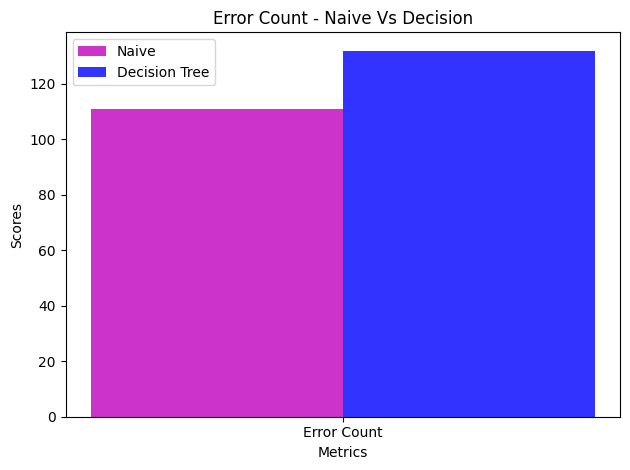

In [ ]:
n_groups = 1
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.05
opacity = 0.8

rects1 = plt.bar(index, naive_errors, bar_width,
alpha=opacity,
color='m',
label='Naive')

rects2 = plt.bar(index + bar_width, dt_errors, bar_width,
alpha=opacity,
color='b',
label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Error Count - Naive Vs Decision')
# The following line is changed.
# Previously: plt.xticks(index + bar_width, ('Error Count'))
# This resulted in an error as ('Error Count') was interpreted as 11 labels.
# We want a single label, so we encapsulate 'Error Count' in a list: ['Error Count'].
plt.xticks(index + bar_width/2, ['Error Count']) # Put 'Error Count' in a list
plt.legend()

plt.tight_layout()
plt.show()

**Conclusion:**  
The comparison of performance between the test set and the dev-test set yields notable findings. While the Decision Tree model achieved higher training accuracy compared to the Naive Bayes model, it also resulted in a significantly greater number of unmatched errors. On the other hand, when considering the average accuracy across the three datasets and the consistency of matched predictions, the Naive Bayes model demonstrated superior performance overall, outperforming the Decision Tree model.
